<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Naive Bayes Project-Titanic

## Import Libraries

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get Dataset

In [238]:
df = pd.read_csv('titanic_train.csv')

## Exploratory Data Analysis: EDA


In [239]:
# show 5 top head of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [240]:
#show dimention of dataset
df.shape

(891, 12)

Dataset inclues 891 samples and 12 features

In [241]:
#show information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are Null values in 3 columns: Age,Cabin and Embarked

In [242]:
#show the number of Null values in each columns
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [243]:
#show duplicated values
df.duplicated().sum()

0

## visualizing Null values by Heatmap

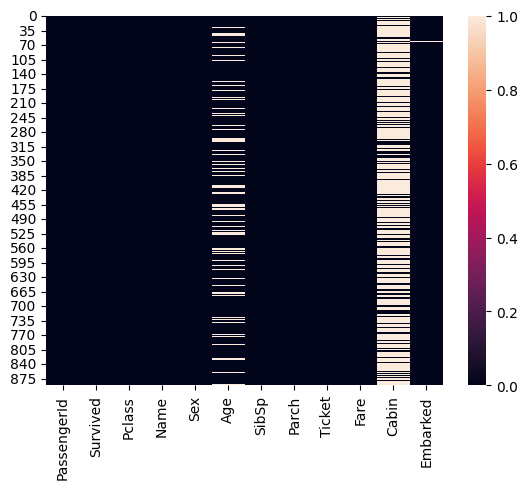

In [244]:
sns.heatmap(df.isnull());

As shown roughly 20% of data in "Age" column is missing and most part of the missing data is seen in "Cabin" column.

## Preprocessing

In [245]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [246]:
#remove unused data
df = df.drop(['Cabin','Fare','Ticket','Name','PassengerId'],axis = 1)

In [247]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [248]:
df['Embarked']=df['Embarked'].fillna('S')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [250]:
mean_age=df.groupby('Pclass')['Age'].mean()
print(mean_age)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [251]:
def impute_null(col):
  Age = col[0]
  Pclass = col[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 38
    elif Pclass == 2 :
      return 30
    else:
     return 25
  return Age


In [252]:
df['Age']=df[['Age' , 'Pclass']].apply(impute_null,axis =1)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [254]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## Convert categorical features

In [255]:
df=pd.get_dummies(data=df,drop_first=True)

## Train Test Split

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [258]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.25,random_state=101)

## Build Naive Bayes Model

In [259]:
from sklearn.naive_bayes import GaussianNB

In [260]:
nbg=GaussianNB()

In [261]:
nbg.fit(X_train,y_train)

GaussianNB()

## Evaluation

In [262]:
print(nbg.score(X_test, y_test))

0.7757847533632287


In [263]:
y_pred=nbg.predict(X_test)

In [264]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

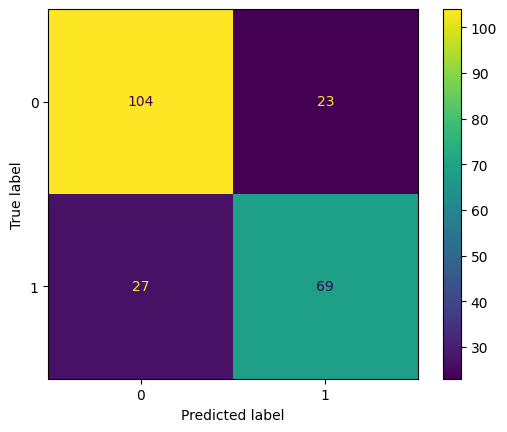

In [265]:
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='viridis');

In [266]:
print(cm)
print(report)

[[104  23]
 [ 27  69]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       127
           1       0.75      0.72      0.73        96

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.77      0.78      0.78       223



## Improve Naive Bayes Model

### Var_smoothing:
The var_smoothing parameter in the scikit-learn Gaussian Naive Bayes (GaussianNB) model is used to add a small, positive value to the estimated variances of the features. This is done to ensure numerical stability, particularly when dealing with datasets where some features have zero variance. Adding a small value helps prevent division by zero during the calculation of probabilities.

## Grid Search:

Grid search is a technique used in machine learning to find the optimal hyperparameters for a model. Hyperparameters are external configurations of a model that are not learned from the data, such as learning rates, regularization strengths, or the number of hidden layers in a neural network. Grid search involves specifying a grid of hyperparameter values and training the model with all possible combinations of these values. The combination that yields the best performance, as measured by a specified metric (e.g., accuracy, precision, recall), is then selected as the optimal set of hyperparameters.

## Running Naive Bayes Model and finding the optimal "var_smoother"

In [267]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [268]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}
nbg =GaussianNB()
clf=GridSearchCV(nbg,param_grid,cv = 5)

In [269]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]})

In [270]:
print(clf.best_params_)

{'var_smoothing': 1e-09}
